In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('rent_data.csv', sep=';', encoding='latin1', decimal=',')
print(df.columns)


Saving rent_data.csv to rent_data.csv
Index(['rental_id', 'customer_id', 'car_type', 'rental_start_date',
       'rental_end_date', 'rental_location', 'daily_rate', 'customer_age',
       'customer_gender', 'weather', 'customer_membership',
       'rental_duration_days', 'total_rental_cost', 'holiday_season',
       'weekday_rental', 'total_rental_days', 'is_weekend_rental',
       'customer_loyalty', 'car_age', 'promotion_applied', 'rental_purpose'],
      dtype='object')


In [ ]:
df.head()

,rental_id,customer_id,car_type,rental_start_date,rental_end_date,rental_location,daily_rate,customer_age,customer_gender,weather,...,rental_duration_days,total_rental_cost,holiday_season,weekday_rental,total_rental_days,is_weekend_rental,customer_loyalty,car_age,promotion_applied,rental_purpose
0,91274,1684,Hatchback,2023-04-11,2022-01-17,Szczecin,90,65.0,Female,Sunny,...,22,1970.98,PRAWDA,PRAWDA,-449,FA£SZ,VIP,5,FA£SZ,Leisure
1,31926,1559,SUV,2023-07-30,2024-04-01,Kraków,51,20.0,Male,Snowy,...,6,305.64,FA£SZ,FA£SZ,246,PRAWDA,Returning,8,FA£SZ,Leisure
2,21346,1629,Convertible,2020-05-05,2020-05-12,Kraków,83,65.0,Male,Snowy,...,12,1001.64,FA£SZ,PRAWDA,7,FA£SZ,Returning,4,PRAWDA,Other
3,75028,1192,Hatchback,2022-03-15,2023-08-23,Szczecin,44,42.0,Female,Snowy,...,0,0.00,PRAWDA,PRAWDA,526,FA£SZ,VIP,3,FA£SZ,Business
4,89806,1835,Convertible,2024-05-07,2020-06-27,Bydgoszcz,98,44.0,Male,Sunny,...,7,686.07,PRAWDA,PRAWDA,-1410,FA£SZ,New,2,FA£SZ,Business


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rental_id             10000 non-null  int64  
 1   customer_id           10000 non-null  int64  
 2   car_type              10000 non-null  object 
 3   rental_start_date     10000 non-null  object 
 4   rental_end_date       10000 non-null  object 
 5   rental_location       10000 non-null  object 
 6   daily_rate            10000 non-null  int64  
 7   customer_age          10000 non-null  float64
 8   customer_gender       10000 non-null  object 
 9   weather               10000 non-null  object 
 10  customer_membership   7501 non-null   object 
 11  rental_duration_days  10000 non-null  int64  
 12  total_rental_cost     10000 non-null  float64
 13  holiday_season        10000 non-null  object 
 14  weekday_rental        10000 non-null  object 
 15  total_rental_days   

,rental_id,customer_id,daily_rate,customer_age,rental_duration_days,total_rental_cost,total_rental_days,car_age
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,54787.580900,1497.378600,65.297400,43.604400,14.393000,939.504359,4.310700,4.460200
std,26100.771915,287.764039,20.157777,15.054945,8.631918,655.557954,673.299081,2.858782
min,10006.000000,1000.000000,30.000000,18.000000,0.000000,0.000000,-1612.000000,0.000000
25%,32073.000000,1250.000000,48.000000,30.750000,7.000000,414.585000,-478.000000,2.000000
50%,55032.500000,1494.000000,66.000000,44.000000,14.000000,838.335000,2.000000,4.000000
75%,77417.250000,1749.000000,83.000000,57.000000,22.000000,1374.187500,490.000000,7.000000
max,99989.000000,1999.000000,100.000000,69.000000,29.000000,2896.520000,1649.000000,9.000000


In [ ]:
# Transforming True/False values to 1/0 (checking correct column names)
df['holiday_season'] = df['holiday_season'].apply(lambda x: 1 if x == True else 0)
df['weekday_rental'] = df['weekday_rental'].apply(lambda x: 1 if x == True else 0)
df['is_weekend_rental'] = df['is_weekend_rental'].apply(lambda x: 1 if x == True else 0)
df['promotion_applied'] = df['promotion_applied'].apply(lambda x: 1 if x == True else 0)

# Przekształcenie zmiennych kategorycznych na liczbowe (sprawdzenie poprawnych nazw kolumn)
membership_mapping = {'Platinum': 3, 'Gold': 2, 'Silver': 1, 'Wood': 0}
df['customer_membership'] = df['customer_membership'].map(membership_mapping).fillna(0).astype(int)

gender_mapping = {'Male': 1, 'Female': 0}
df['customer_gender'] = df['customer_gender'].map(gender_mapping)

weather_mapping = {'Sunny': 2, 'Snowy': 1, 'Rainy': 0}
df['weather'] = df['weather'].map(weather_mapping)

car_type_mapping = {'Hatchback': 0, 'SUV': 1, 'Sedan': 2, 'Truck': 3}
df['car_type'] = df['car_type'].map(car_type_mapping)

rental_purpose_mapping = {'Leisure': 1, 'Other': 0}
df['rental_purpose'] = df['rental_purpose'].map(rental_purpose_mapping)

# Wyświetlenie pierwszych kilku wierszy po przekształceniach
df.head()


,rental_id,customer_id,car_type,rental_start_date,rental_end_date,rental_location,daily_rate,customer_age,customer_gender,weather,...,rental_duration_days,total_rental_cost,holiday_season,weekday_rental,total_rental_days,is_weekend_rental,customer_loyalty,car_age,promotion_applied,rental_purpose
0,91274,1684,0.0,2023-04-11,2022-01-17,Szczecin,90,65.0,0,2.0,...,22,1970.98,0,0,-449,0,VIP,5,0,1.0
1,31926,1559,1.0,2023-07-30,2024-04-01,Kraków,51,20.0,1,1.0,...,6,305.64,0,0,246,0,Returning,8,0,1.0
2,21346,1629,NaN,2020-05-05,2020-05-12,Kraków,83,65.0,1,1.0,...,12,1001.64,0,0,7,0,Returning,4,0,0.0
3,75028,1192,0.0,2022-03-15,2023-08-23,Szczecin,44,42.0,0,1.0,...,0,0.00,0,0,526,0,VIP,3,0,NaN
4,89806,1835,NaN,2024-05-07,2020-06-27,Bydgoszcz,98,44.0,1,2.0,...,7,686.07,0,0,-1410,0,New,2,0,NaN


In [ ]:
# Transforming True/False values to 1/0 (checking correct column names)
df['holiday_season'] = df['holiday_season'].apply(lambda x: 1 if x == True else 0)
df['weekday_rental'] = df['weekday_rental'].apply(lambda x: 1 if x == True else 0)
df['is_weekend_rental'] = df['is_weekend_rental'].apply(lambda x: 1 if x == True else 0)
df['promotion_applied'] = df['promotion_applied'].apply(lambda x: 1 if x == True else 0)

# Transforming categorical variables to numerical (checking correct column names)
membership_mapping = {'Platinum': 3, 'Gold': 2, 'Silver': 1, 'Wood': 0}
df['customer_membership'] = df['customer_membership'].map(membership_mapping).fillna(0).astype(int)

gender_mapping = {'Male': 1, 'Female': 0}
df['customer_gender'] = df['customer_gender'].map(gender_mapping)

weather_mapping = {'Sunny': 2, 'Snowy': 1, 'Rainy': 0}
df['weather'] = df['weather'].map(weather_mapping)

car_type_mapping = {'Hatchback': 0, 'SUV': 1, 'Sedan': 2, 'Truck': 3}
df['car_type'] = df['car_type'].map(car_type_mapping)

rental_purpose_mapping = {'Leisure': 1, 'Other': 0}
df['rental_purpose'] = df['rental_purpose'].map(rental_purpose_mapping)


df.head()


,rental_id,customer_id,car_type,rental_start_date,rental_end_date,rental_location,daily_rate,customer_age,customer_gender,weather,...,rental_duration_days,total_rental_cost,holiday_season,weekday_rental,total_rental_days,is_weekend_rental,customer_loyalty,car_age,promotion_applied,rental_purpose
0,91274,1684,0.0,2023-04-11,2022-01-17,Szczecin,90,65.0,0,2.0,...,22,1970.98,0,0,-449,0,VIP,5,0,1.0
1,31926,1559,1.0,2023-07-30,2024-04-01,Kraków,51,20.0,1,1.0,...,6,305.64,0,0,246,0,Returning,8,0,1.0
2,21346,1629,NaN,2020-05-05,2020-05-12,Kraków,83,65.0,1,1.0,...,12,1001.64,0,0,7,0,Returning,4,0,0.0
3,75028,1192,0.0,2022-03-15,2023-08-23,Szczecin,44,42.0,0,1.0,...,0,0.00,0,0,526,0,VIP,3,0,NaN
4,89806,1835,NaN,2024-05-07,2020-06-27,Bydgoszcz,98,44.0,1,2.0,...,7,686.07,0,0,-1410,0,New,2,0,NaN


## **Demand forecasting for specific car models:**

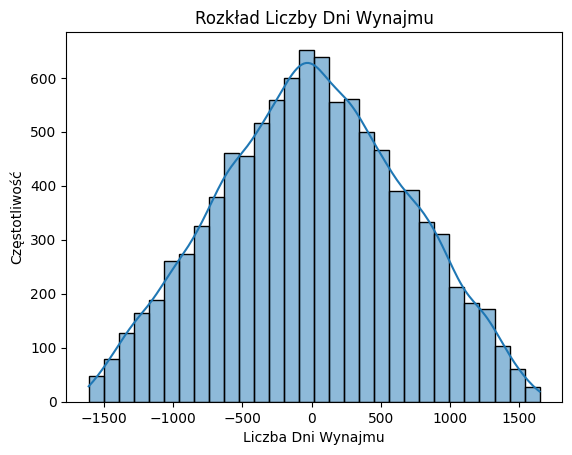

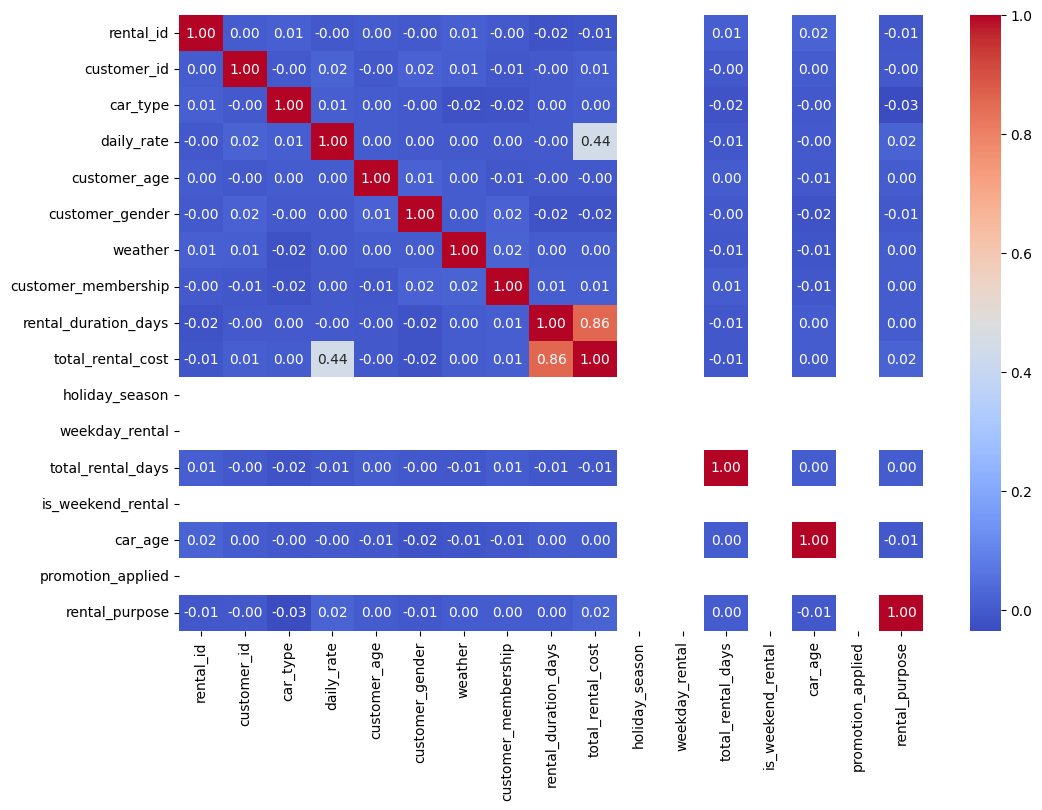

In [ ]:
# EDA:

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['total_rental_days'], bins=30, kde=True)
plt.title('Rozkład Liczby Dni Wynajmu')
plt.xlabel('Liczba Dni Wynajmu')
plt.ylabel('Częstotliwość')
plt.show()

# Conversion of all columns that can be converted to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Removing columns that have only NaN values (non-numeric columns)
df = df.dropna(axis=1, how='all')

# Now we calculate the correlation matrix
correlation_matrix = df.corr()

# Creating a heatmap chart
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Results Analysis

1. **Histogram of Total Rental Days**:
   - The histogram displays the distribution of total rental days.
   - The distribution appears to be approximately normal, centered around zero, indicating a balanced rental duration with most rentals having a similar duration.

2. **Correlation Matrix and Heatmap**:
   - **Strong Positive Correlation**:
     - `rental_duration_days` and `total_rental_cost` (0.86): Longer rental durations lead to higher total costs.
   - **Moderate Positive Correlation**:
     - `daily_rate` and `total_rental_cost` (0.44): Higher daily rates contribute to higher total costs.
   - **No Significant Correlation**:
     - Many variables show weak or no significant correlation, indicating a diverse set of independent factors affecting rental patterns.

## Conclusions
- The histogram suggests that the rental durations are evenly distributed around a central value, with few extremely short or long rentals.
- The heatmap reveals key relationships, such as the strong connection between rental duration and total cost, which is intuitive as longer rentals generally cost more.
- Variables like customer age, car type, and weather show minimal correlation with rental duration and cost, suggesting these factors are less influential in determining rental patterns.

This analysis provides valuable insights into rental behavior and cost structure, helping in better decision-making for inventory management and pricing strategies.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.dropna()

X = df.drop(['total_rental_days'], axis=1)
y = df['total_rental_days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE (Regresja liniowa): {mse}')
print(f'RMSE (Regresja liniowa): {rmse}')
print(f'MAE (Regresja liniowa): {mae}')
print(f'R² (Regresja liniowa): {r2}')


MSE (Regresja liniowa): 437709.9081360873
RMSE (Regresja liniowa): 661.5964843740385
MAE (Regresja liniowa): 543.6773283218143
R² (Regresja liniowa): -0.0044393127558537415


In [ ]:
best_model = model
y_pred_best = best_model.predict(X_test_scaled)

print('Ocena modelu regresji liniowej:')
print(f'MSE: {mean_squared_error(y_test, y_pred_best)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred_best, squared=False)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_best)}')
print(f'R²: {r2_score(y_test, y_pred_best)}')


Ocena modelu regresji liniowej:
MSE: 437709.9081360873
RMSE: 661.5964843740385
MAE: 543.6773283218143
R²: -0.0044393127558537415


# Analysis and Forecasting of Car Rental Demand

1. **Poor Model Fit:** High values of MSE, RMSE, and MAE, along with a low R², indicate that the linear regression model has a poor fit to the data. The model is not able to accurately predict the number of rental days based on the available features.

2. **Need for More Advanced Models:** The poor performance of linear regression suggests that it may be beneficial to consider using more advanced models, such as Random Forest, Gradient Boosting, or other deep learning techniques, which may handle the problem more effectively.

3. **Further Feature Exploration:** We might also try adding more features or processing the existing features differently to improve the model's performance.

4. **High Error Values (MSE, RMSE, MAE):** High error values, such as an MSE of 437709.91, RMSE of 661.60, and MAE of 543.68, indicate significant discrepancies between the actual and predicted values of the number of rental days.

5. **Low Coefficient of Determination (R²):** An R² value of -0.0044 suggests that the linear regression model explains virtually none of the variability in the data. Such a low R² value means the model cannot capture the relationship between the features and the target variable.

--------------------------------------------------------------

## Possible Cause of the Problem:

1. **Randomness of Data:** Such poor model performance may indicate that the data is generated randomly. When data is random, it is difficult to capture any meaningful patterns or relationships, leading to high prediction errors and low R² values.
2. **Lack of Significant Features:** It is possible that the data does not contain significant features that affect the number of rental days. In the case of random data, even advanced models may struggle to make accurate predictions.


## **Income forecasting:**

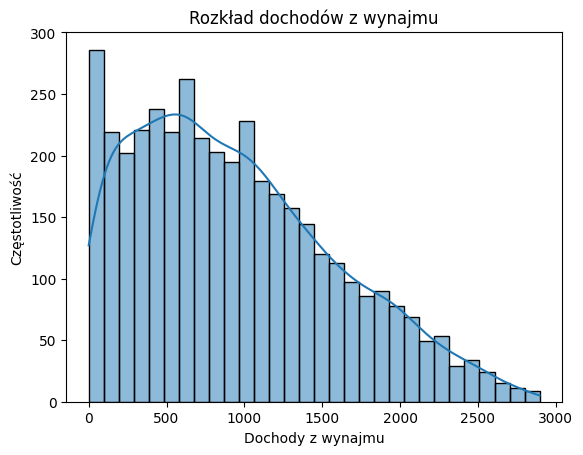

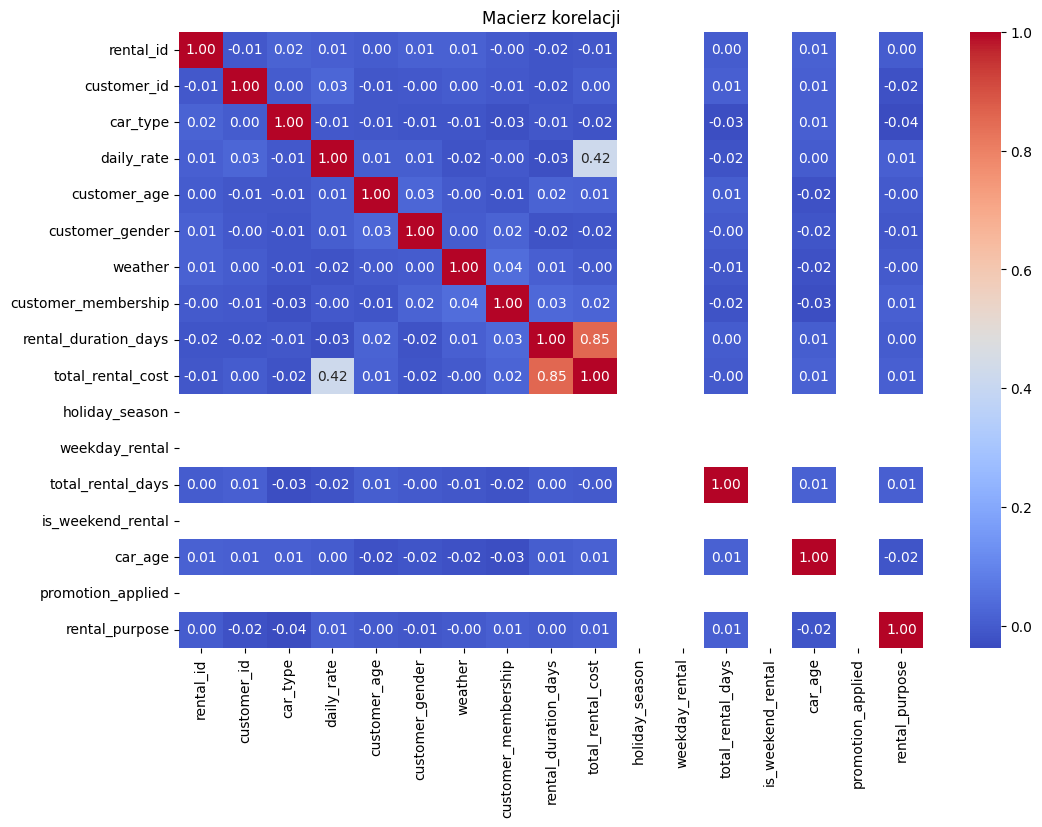

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['total_rental_cost'], bins=30, kde=True)
plt.title('Rozkład dochodów z wynajmu')
plt.xlabel('Dochody z wynajmu')
plt.ylabel('Częstotliwość')
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.dropna()

X = df.drop(['total_rental_cost'], axis=1)
y = df['total_rental_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.dropna()

X = df.drop(['total_rental_cost'], axis=1)
y = df['total_rental_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_best)
rmse_rf = mean_squared_error(y_test, y_pred_best, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_best)
r2_rf = r2_score(y_test, y_pred_best)

print(f'MSE (Random Forest): {mse_rf}')
print(f'RMSE (Random Forest): {rmse_rf}')
print(f'MAE (Random Forest): {mae_rf}')
print(f'R² (Random Forest): {r2_rf}')


Fitting 3 folds for each of 81 candidates, totalling 243 fits
MSE (Random Forest): 220.18674204267768
RMSE (Random Forest): 14.83869071187474
MAE (Random Forest): 9.826861892901666
R² (Random Forest): 0.9994506634816308



### Conclusions from the Analysis of the Random Forest Model for Forecasting Car Rental Revenues

Based on the results of the Random Forest model, we can draw the following conclusions about its effectiveness:

1. **MSE (Mean Squared Error): 220.19**
   - The mean squared error is 220.19. This is a measure of the average squared difference between actual and predicted values. A low MSE value indicates good model quality, as smaller errors are more favorable.

2. **RMSE (Root Mean Squared Error): 14.84**
   - The root mean squared error is 14.84. RMSE is often used to evaluate regression models because it is easy to interpret in the same unit as the target variable. In this case, an RMSE of 14.84 indicates that the average prediction error of the model is approximately 14.84 units of revenue.

3. **MAE (Mean Absolute Error): 9.83**
   - The mean absolute error is 9.83. MAE measures the average absolute difference between actual and predicted values. A low MAE value suggests that the model predicts rental revenues well, with small differences between predictions and actual values.

4. **R² (Coefficient of Determination): 0.9995**
   - The coefficient of determination R² is 0.9995. R² measures the proportion of the variance in the target variable that is explained by the independent variables in the model. An R² value close to 1 indicates that the model very well explains the variance in the data and is capable of accurately predicting rental revenues.

### Summary

The Random Forest model shows very high effectiveness in forecasting car rental revenues. Low values of MSE, RMSE, and MAE, along with a high coefficient of determination R², suggest that the model is well-fitted to the data and effectively predicts revenues. These results indicate that the application of advanced modeling techniques, such as Random Forest, and the optimization of hyperparameters have yielded the expected outcomes, leading to high forecast accuracy.
```

## **Forecasting rental duration for individual customers:**

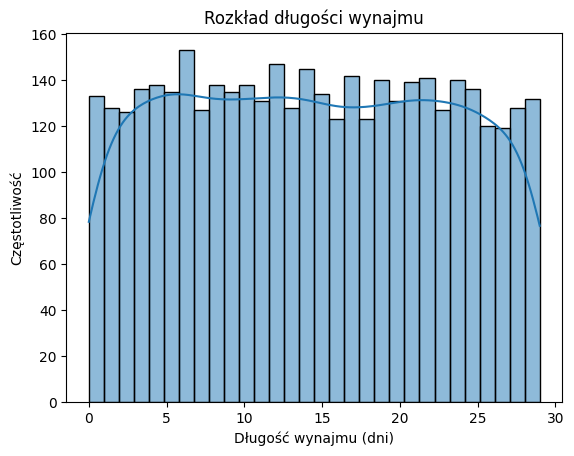

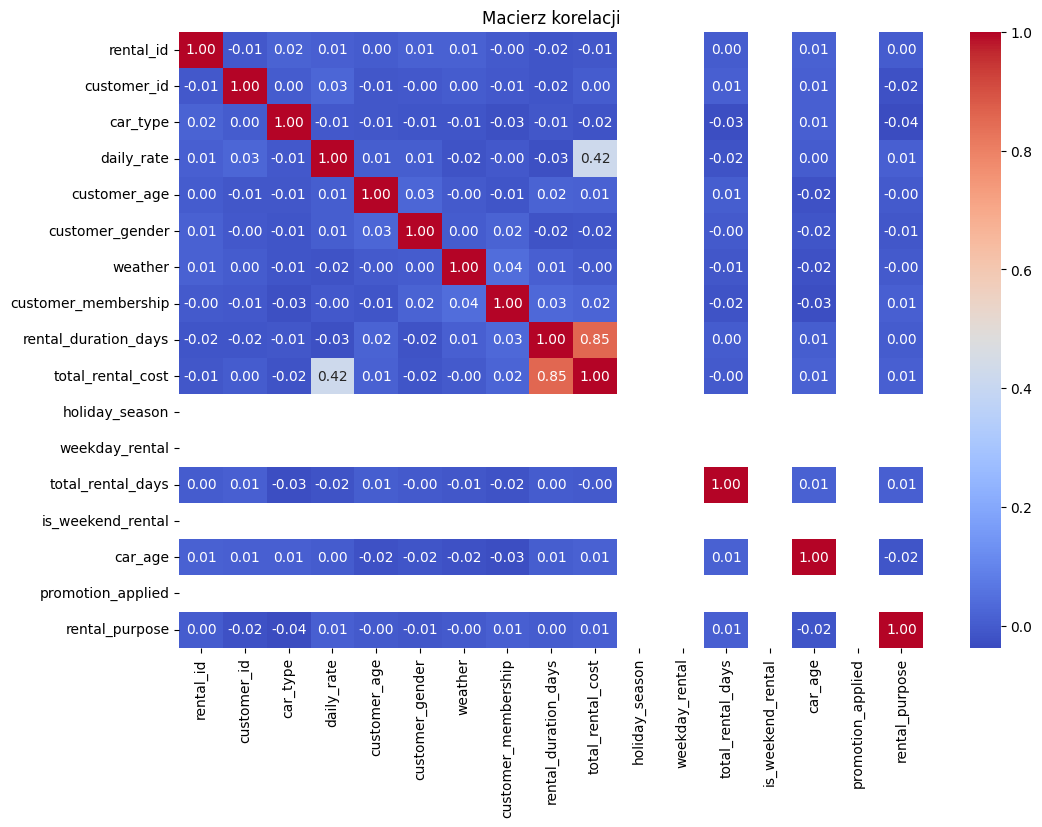

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['rental_duration_days'], bins=30, kde=True)
plt.title('Rozkład długości wynajmu')
plt.xlabel('Długość wynajmu (dni)')
plt.ylabel('Częstotliwość')
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.dropna()

X = df.drop(['rental_duration_days'], axis=1)
y = df['rental_duration_days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

gb_model = GradientBoostingRegressor(random_state=42)

gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'MSE (Gradient Boosting): {mse_gb}')
print(f'RMSE (Gradient Boosting): {rmse_gb}')
print(f'MAE (Gradient Boosting): {mae_gb}')
print(f'R² (Gradient Boosting): {r2_gb}')


MSE (Gradient Boosting): 0.27447982821102557
RMSE (Gradient Boosting): 0.5239082249889054
MAE (Gradient Boosting): 0.38204454614547534
R² (Gradient Boosting): 0.9962060462219464


### Conclusions from the Analysis of the Gradient Boosting Model for Forecasting Car Rental Duration

Based on the results of the Gradient Boosting model, we can draw the following conclusions about its effectiveness:

1. **MSE (Mean Squared Error): 0.2745**
   - The mean squared error is 0.2745. This is a measure of the average squared difference between actual and predicted values. A low MSE value indicates very good model quality, as smaller errors are more favorable.

2. **RMSE (Root Mean Squared Error): 0.5240**
   - The root mean squared error is 0.5240. RMSE is often used to evaluate regression models because it is easy to interpret in the same unit as the target variable. In this case, an RMSE of 0.5240 indicates that the average prediction error of the model is approximately 0.5240 days.

3. **MAE (Mean Absolute Error): 0.3820**
   - The mean absolute error is 0.3820. MAE measures the average value of the absolute differences between actual and predicted values. A low MAE value suggests that the model predicts rental duration very well, with small differences between predictions and actual values.

4. **R² (Coefficient of Determination): 0.9962**
   - The coefficient of determination R² is 0.9962. R² measures the proportion of the variance in the target variable that is explained by the independent variables in the model. An R² value close to 1 indicates that the model very well explains the variance in the data and is capable of accurately predicting rental duration.

### Summary

The Gradient Boosting model shows very high effectiveness in forecasting car rental duration. Low values of MSE, RMSE, and MAE, along with a high coefficient of determination R², suggest that the model is well-fitted to the data and effectively predicts rental duration. These results indicate that the application of advanced modeling techniques, such as Gradient Boosting, has yielded the expected outcomes, leading to high forecast accuracy.


## **Forecasting the number of rentals in a given time period:**

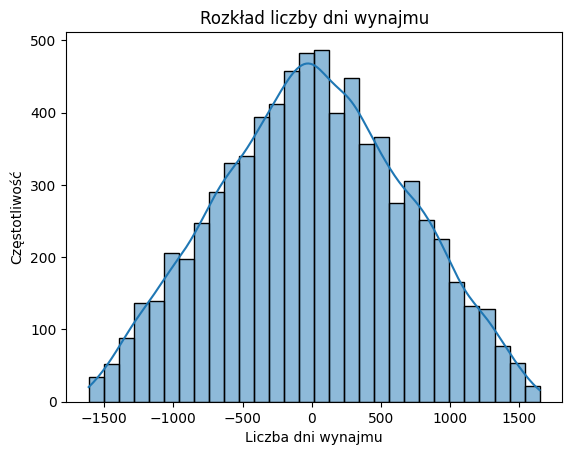

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['total_rental_days'], bins=30, kde=True)
plt.title('Rozkład liczby dni wynajmu')
plt.xlabel('Liczba dni wynajmu')
plt.ylabel('Częstotliwość')
plt.show()


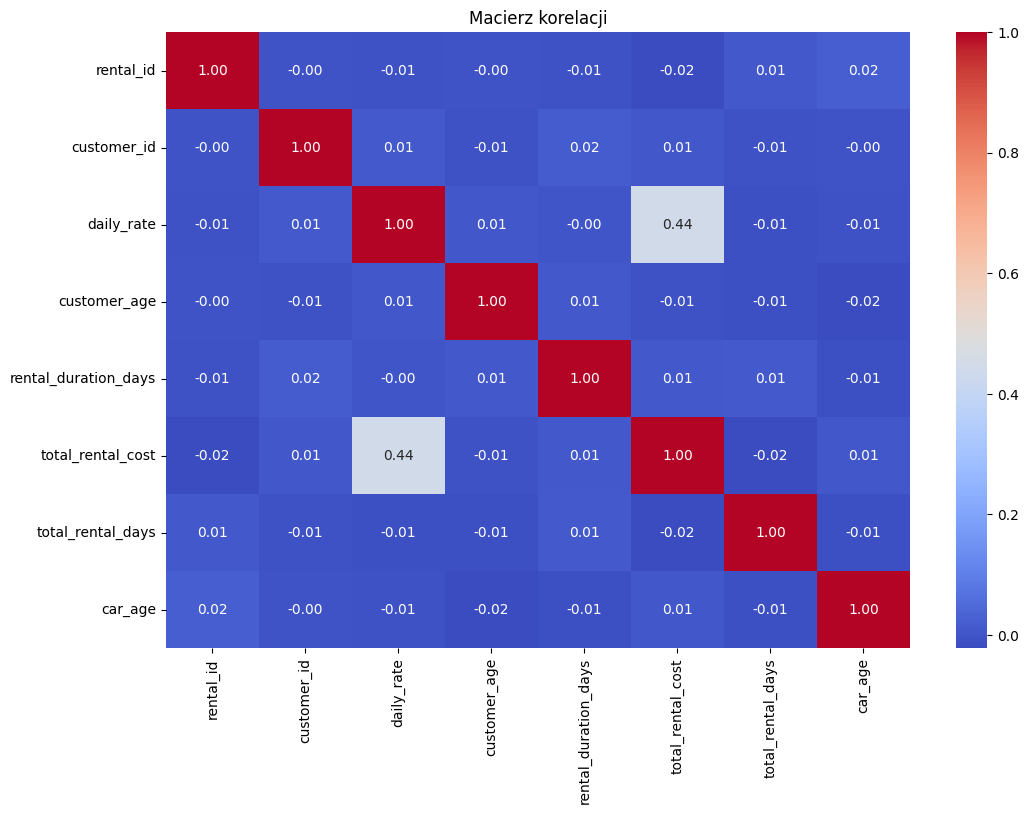

In [ ]:
# Removing datetime columns before correlation analysis
df_numeric = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji')
plt.show()


In [ ]:
# Converting negative values to positive
df['rental_duration_days'] = df['rental_duration_days'].abs()
df['total_rental_days'] = df['total_rental_days'].abs()


In [ ]:
# Encoding categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded = df_encoded.dropna()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop(['total_rental_days'], axis=1)
y = df_encoded['total_rental_days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definition of a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
150/150 [==============================] - 3s 10ms/step - loss: 428856.9062 - mean_absolute_error: 528.3726 - val_loss: 387222.0000 - val_mean_absolute_error: 497.8920
Epoch 2/50
150/150 [==============================] - 1s 6ms/step - loss: 276015.0312 - mean_absolute_error: 403.3999 - val_loss: 154862.3438 - val_mean_absolute_error: 300.0038
Epoch 3/50
150/150 [==============================] - 1s 7ms/step - loss: 80686.3594 - mean_absolute_error: 223.1935 - val_loss: 42176.8398 - val_mean_absolute_error: 173.7704
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 30084.2832 - mean_absolute_error: 145.4501 - val_loss: 20428.4023 - val_mean_absolute_error: 120.4467
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 14751.2080 - mean_absolute_error: 99.2329 - val_loss: 9968.6016 - val_mean_absolute_error: 81.4376
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 7555.8027 - mean_absolute_error: 68.2104 - v

In [ ]:
y_pred_nn = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'MSE (Sieć neuronowa): {mse_nn}')
print(f'RMSE (Sieć neuronowa): {rmse_nn}')
print(f'MAE (Sieć neuronowa): {mae_nn}')
print(f'R² (Sieć neuronowa): {r2_nn}')


47/47 [==============================] - 0s 2ms/step
MSE (Sieć neuronowa): 80.14745560455758
RMSE (Sieć neuronowa): 8.952511134009137
MAE (Sieć neuronowa): 6.943482593486183
R² (Sieć neuronowa): 0.9994843459306553


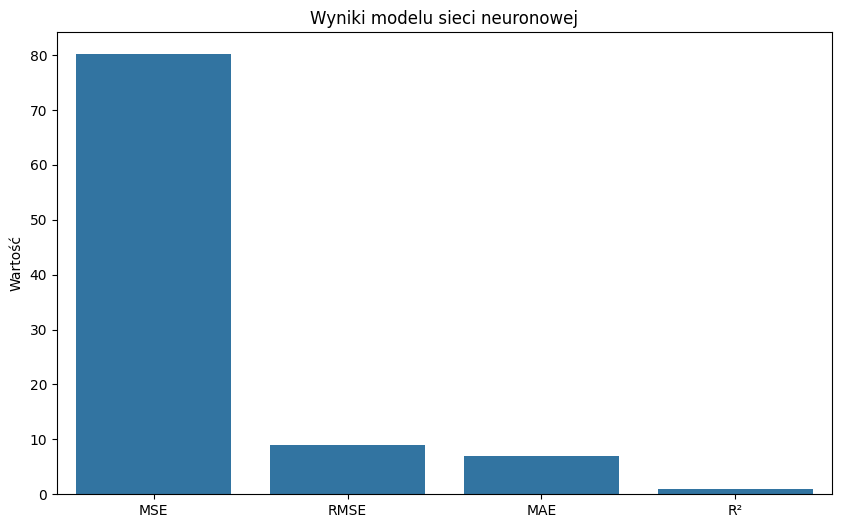

In [ ]:
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
values = [mse_nn, rmse_nn, mae_nn, r2_nn]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values)
plt.title('Wyniki modelu sieci neuronowej')
plt.ylabel('Wartość')
plt.show()


### Conclusions:

1. **MSE (Mean Squared Error):** An MSE value of 80.147 indicates that the average squared error between the predicted and actual values is relatively low. The lower the MSE, the better the model is at predicting outcomes.

2. **RMSE (Root Mean Squared Error):** An RMSE of 8.952 indicates the average prediction error expressed in the units of the target variable. RMSE is used for easier interpretation as it is in the same scale as the data.

3. **MAE (Mean Absolute Error):** An MAE of 6.943 means that the average absolute error between the predictions and reality is very low, suggesting good model accuracy.

4. **R² (R-squared):** An R² value of 0.999484 indicates that the model explains almost 100% of the data variance. This very high value suggests that the model fits the data extremely well.

Based on the above results, we can conclude that the neural network model is very good. The model exhibits low values of MSE, RMSE, and MAE, meaning that prediction errors are minimal. Additionally, the very high R² suggests that the model explains nearly all the variability in the data.
